In [ ]:
import numpy as np

import fasttext.util

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from xgboost import XGBClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

# FastText vectorization

Downloading russian FastText model and obtaining embeddings for first and last names

In [ ]:
fasttext.util.download_model('ru', if_exists='ignore')  # Russian

In [ ]:
ft = fasttext.load_model('cc.ru.300.bin')

In [ ]:
df_transliterated_ru = filter_data(get_raw_data('../data/allNamesClean.csv'))

In [ ]:
dict_vec = {}

for index, row in df_transliterated_ru.iterrows():
    dict_vec[index] = (index, 
                       ft.get_word_vector(row['first_name']),
                       ft.get_word_vector(row['last_name']), 
                       row['ethn']
                       )

In [ ]:
save_pkl('data/allNames_vect_fasttext.pkl', dict_vec)

# Applying vectors

## SVM

In [ ]:
data_fasttext = load_pkl('data/allNames_vect_fasttext.pkl')

In [ ]:
le, X_train, X_test, y_train, y_test = split_vectorized_data(data_fasttext) # data leak

In [ ]:
PIPE_PARAMS = {
        'penalty' : ['elasticnet'],
        'alpha' : [1e-05, 5e-05, 1e-04, 1e-03],
        'random_state' : [0],
        'early_stopping' : [True, False],
        'class_weight' : [None, 'balanced'], 
    }

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed: 20.8min finished


{'alpha': 1e-05, 'class_weight': None, 'early_stopping': False, 'penalty': 'elasticnet', 'random_state': 0}


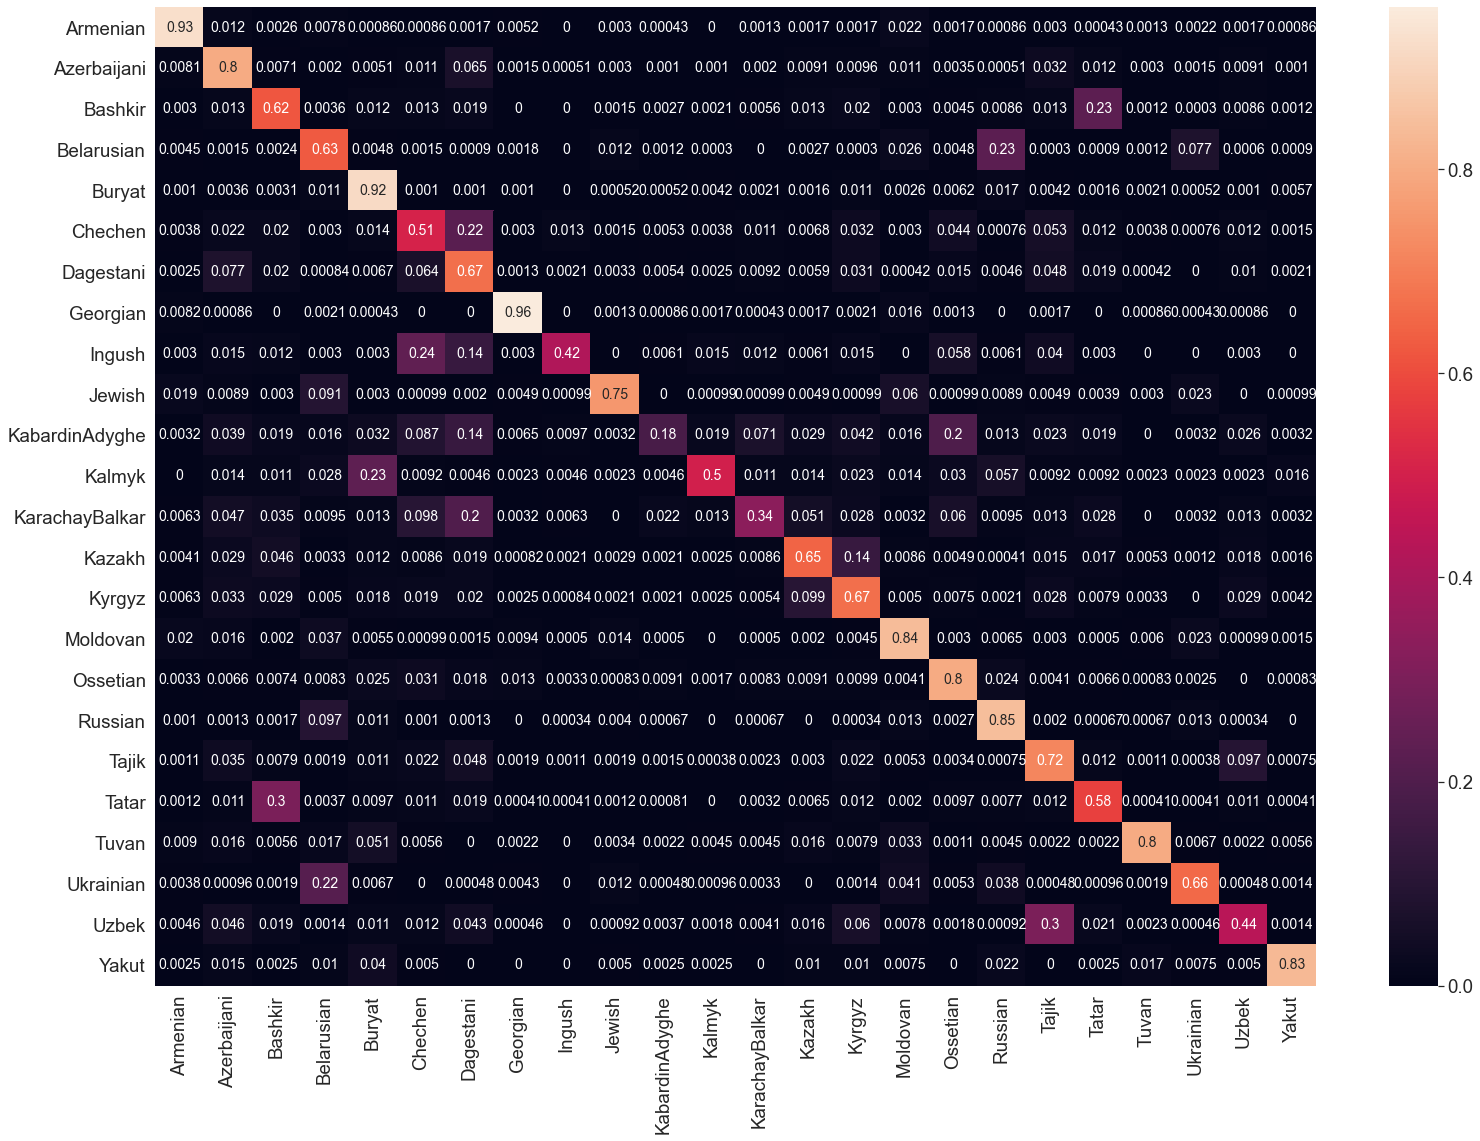

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9266	0.9144	0.9266	0.9205
Azerbaijani    	0.8015	0.6699	0.8015	0.7298
Bashkir        	0.6184	0.6457	0.6184	0.6318
Belarusian     	0.6284	0.6648	0.6284	0.6461
Buryat         	0.9173	0.7706	0.9173	0.8376
Chechen        	0.5061	0.5274	0.5061	0.5165
Dagestani      	0.6672	0.6040	0.6672	0.6340
Georgian       	0.9592	0.9567	0.9592	0.9579
Ingush         	0.4195	0.7419	0.4195	0.5359
Jewish         	0.7535	0.8197	0.7535	0.7852
KabardinAdyghe 	0.1806	0.3784	0.1806	0.2445
Kalmyk         	0.4954	0.7423	0.4954	0.5942
KarachayBalkar 	0.3354	0.3706	0.3354	0.3522
Kazakh         	0.6457	0.7693	0.6457	0.7021
Kyrgyz         	0.6695	0.6486	0.6695	0.6588
Moldovan       	0.8417	0.7650	0.8417	0.8015
Ossetian       	0.8015	0.7308	0.8015	0.7645
Russian        	0.8461	0.7073	0.8461	0.7705
Tajik          	0.7187	0.6233	0.7187	0.6676
Tatar          	0.5793	0.5760	0.5793	0.5777
Tuvan          	0.7987	0.8886	0.7987	0.8412
Ukrainian      	0.6581	0.7755	0.6581	0.7120


In [ ]:
svm = proc_model(SGDClassifier(),
                 PIPE_PARAMS,
                 le, X_train, y_train, X_test, y_test, 
                 vectorization=None)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 15.7min
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed: 24.0min finished


{'alpha': 1e-05, 'class_weight': None, 'early_stopping': False, 'penalty': 'elasticnet', 'random_state': 0}


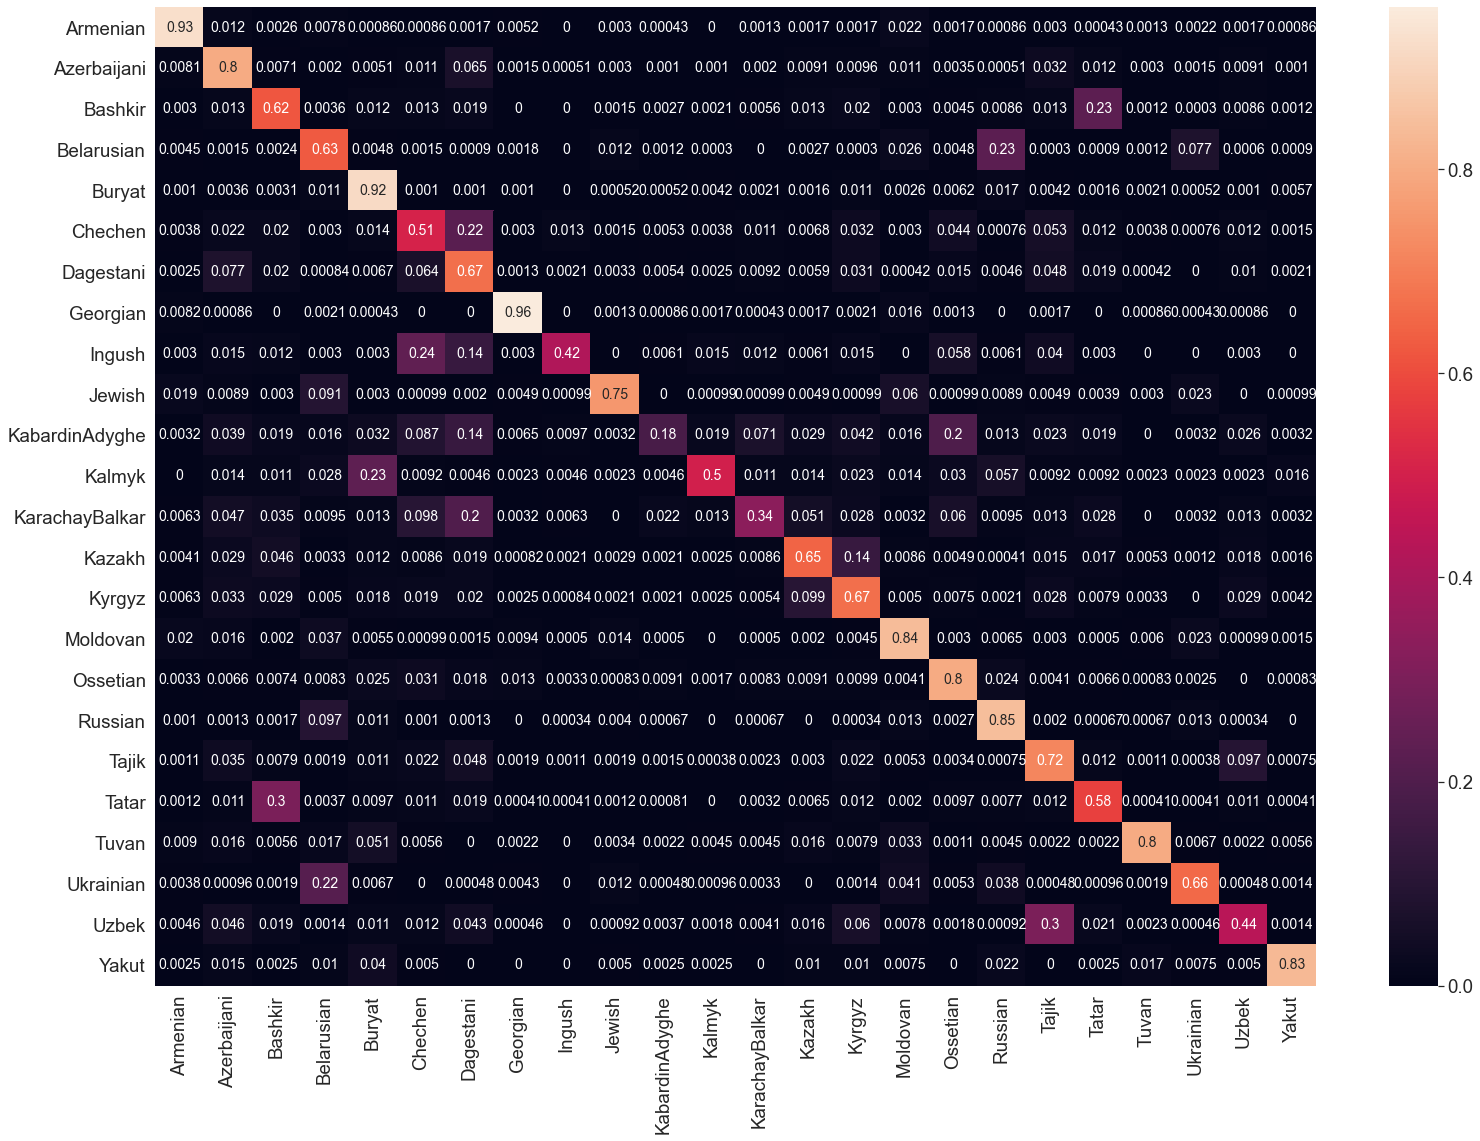

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9266	0.9144	0.9266	0.9205
Azerbaijani    	0.8015	0.6699	0.8015	0.7298
Bashkir        	0.6184	0.6457	0.6184	0.6318
Belarusian     	0.6284	0.6648	0.6284	0.6461
Buryat         	0.9173	0.7706	0.9173	0.8376
Chechen        	0.5061	0.5274	0.5061	0.5165
Dagestani      	0.6672	0.6040	0.6672	0.6340
Georgian       	0.9592	0.9567	0.9592	0.9579
Ingush         	0.4195	0.7419	0.4195	0.5359
Jewish         	0.7535	0.8197	0.7535	0.7852
KabardinAdyghe 	0.1806	0.3784	0.1806	0.2445
Kalmyk         	0.4954	0.7423	0.4954	0.5942
KarachayBalkar 	0.3354	0.3706	0.3354	0.3522
Kazakh         	0.6457	0.7693	0.6457	0.7021
Kyrgyz         	0.6695	0.6486	0.6695	0.6588
Moldovan       	0.8417	0.7650	0.8417	0.8015
Ossetian       	0.8015	0.7308	0.8015	0.7645
Russian        	0.8461	0.7073	0.8461	0.7705
Tajik          	0.7187	0.6233	0.7187	0.6676
Tatar          	0.5793	0.5760	0.5793	0.5777
Tuvan          	0.7987	0.8886	0.7987	0.8412
Ukrainian      	0.6581	0.7755	0.6581	0.7120


In [ ]:
PIPE_PARAMS = {
        'penalty' : ['elasticnet'],
        'alpha' : [1e-06, 5e-06, 1e-05],
        'random_state' : [0],
        'early_stopping' : [True, False],
        'class_weight' : [None, 'balanced'], 
    }

svm = proc_model(SGDClassifier(),
                 PIPE_PARAMS,
                 le, X_train, y_train, X_test, y_test, 
                 vectorization=None)

## Gradient Boosting

In [ ]:
clf = XGBClassifier(n_jobs=6)

In [ ]:
clf.fit(X_train, y_train)

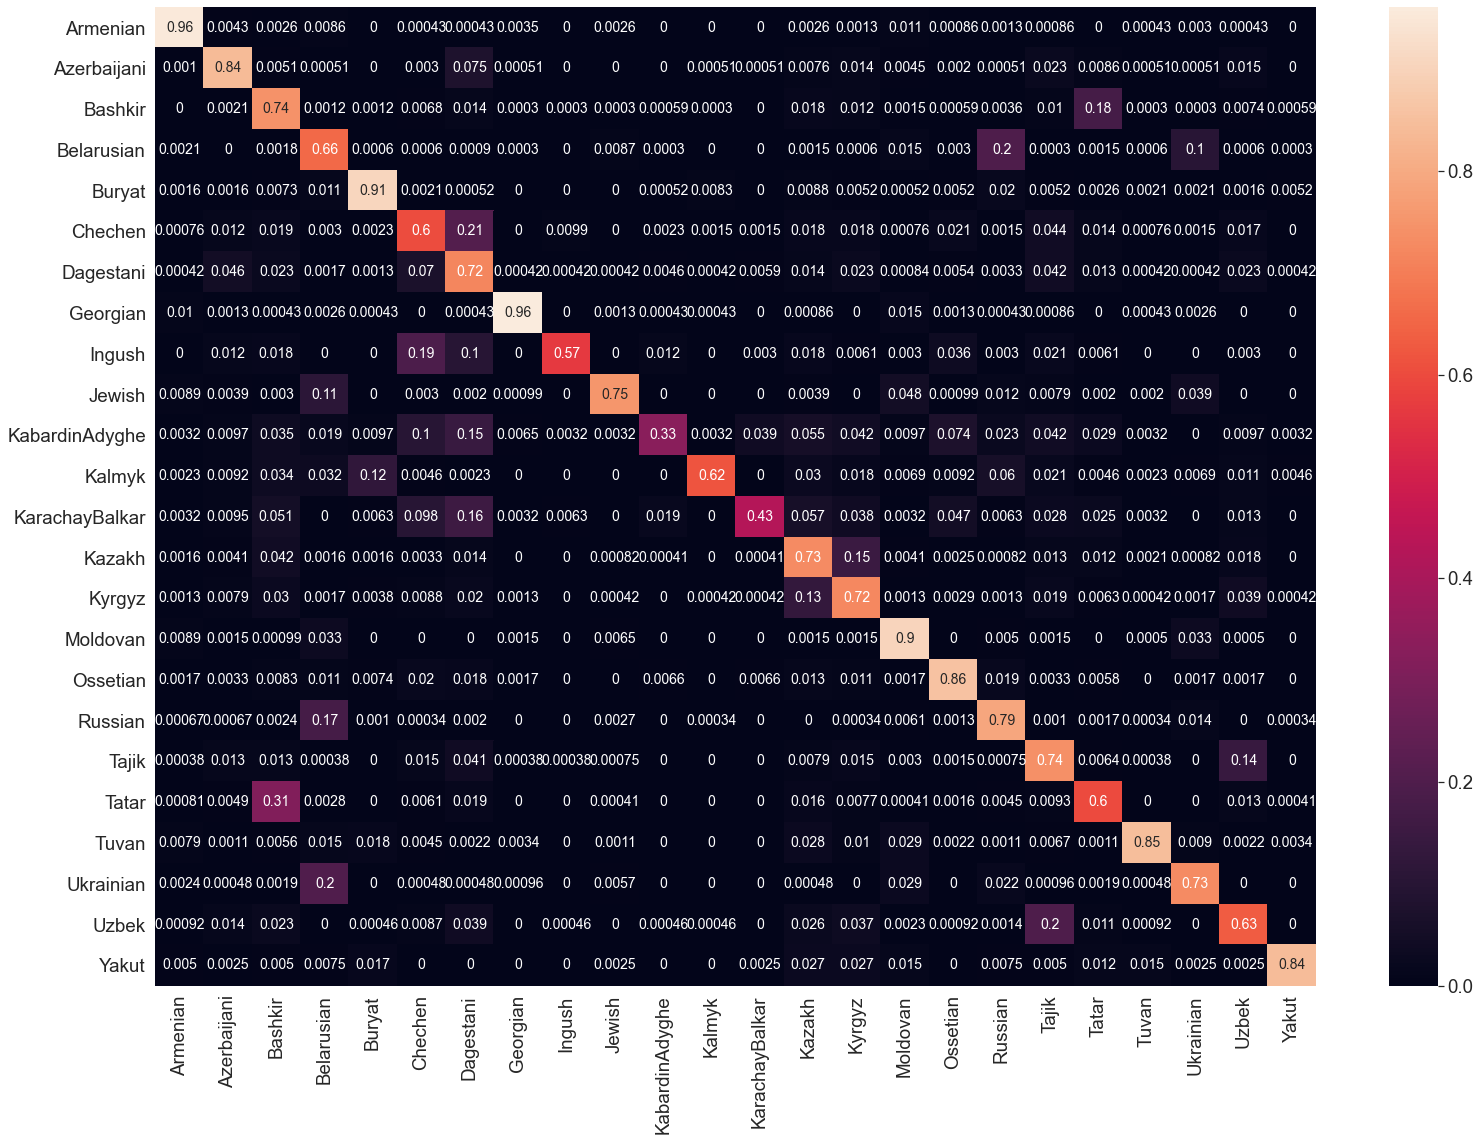

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9560	0.9576	0.9560	0.9568
Azerbaijani    	0.8379	0.8534	0.8379	0.8456
Bashkir        	0.7432	0.6700	0.7432	0.7047
Belarusian     	0.6589	0.6403	0.6589	0.6495
Buryat         	0.9080	0.9357	0.9080	0.9216
Chechen        	0.6043	0.6307	0.6043	0.6172
Dagestani      	0.7200	0.6428	0.7200	0.6792
Georgian       	0.9609	0.9868	0.9609	0.9737
Ingush         	0.5653	0.9029	0.5653	0.6953
Jewish         	0.7515	0.9028	0.7515	0.8202
KabardinAdyghe 	0.3323	0.7254	0.3323	0.4558
Kalmyk         	0.6193	0.9122	0.6193	0.7377
KarachayBalkar 	0.4272	0.7670	0.4272	0.5488
Kazakh         	0.7304	0.7171	0.7304	0.7237
Kyrgyz         	0.7243	0.7037	0.7243	0.7138
Moldovan       	0.9042	0.8494	0.9042	0.8760
Ossetian       	0.8586	0.8701	0.8586	0.8643
Russian        	0.7916	0.7272	0.7916	0.7580
Tajik          	0.7424	0.6988	0.7424	0.7199
Tatar          	0.5992	0.6504	0.5992	0.6237
Tuvan          	0.8481	0.9556	0.8481	0.8987
Ukrainian      	0.7316	0.7387	0.7316	0.7351


{'accuracy': 0.7593916879498491,
 'precision macro': 0.7933235646766145,
 'recall macro': 0.7288237596865491,
 'f1 macro': 0.7523104416453164}

In [ ]:
test_model(clf, le, X_test, y_test)

In [ ]:
clf = XGBClassifier(n_estimators=500, n_jobs=6)

In [ ]:
clf.fit(X_train, y_train)

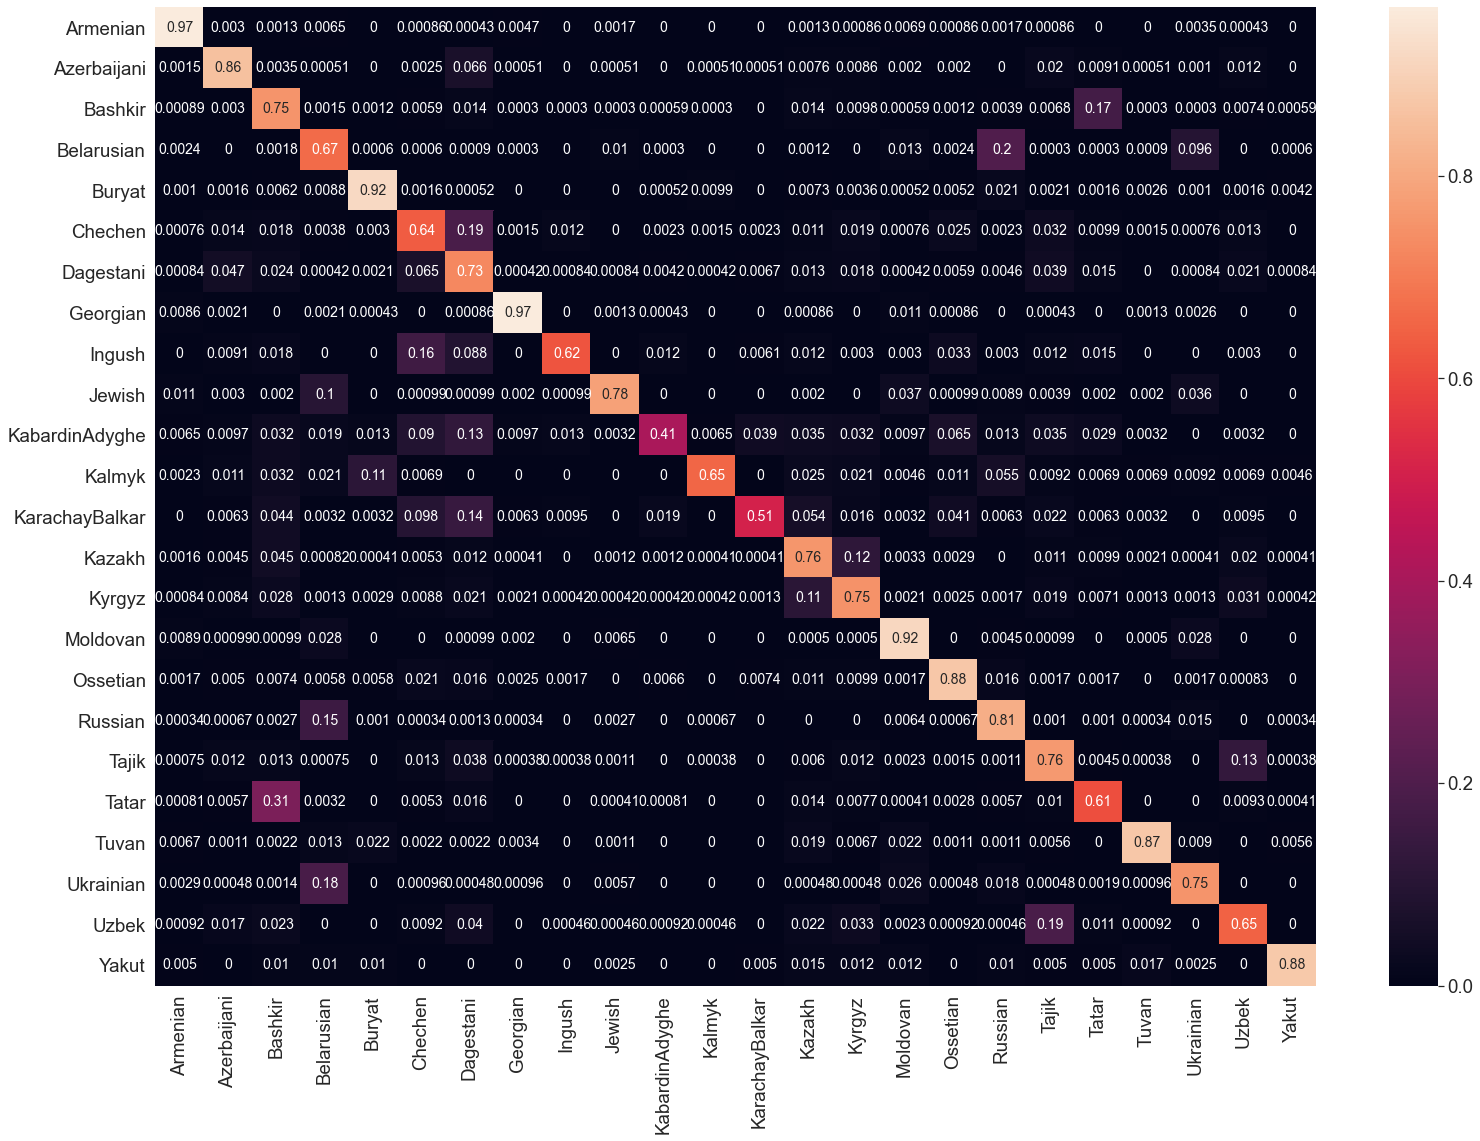

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9650	0.9572	0.9650	0.9611
Azerbaijani    	0.8611	0.8512	0.8611	0.8561
Bashkir        	0.7533	0.6794	0.7533	0.7145
Belarusian     	0.6652	0.6688	0.6652	0.6670
Buryat         	0.9194	0.9404	0.9194	0.9298
Chechen        	0.6370	0.6575	0.6370	0.6471
Dagestani      	0.7288	0.6655	0.7288	0.6957
Georgian       	0.9669	0.9808	0.9669	0.9738
Ingush         	0.6201	0.8644	0.6201	0.7221
Jewish         	0.7840	0.8983	0.7840	0.8373
KabardinAdyghe 	0.4065	0.7412	0.4065	0.5250
Kalmyk         	0.6537	0.8991	0.6537	0.7570
KarachayBalkar 	0.5063	0.7656	0.5063	0.6095
Kazakh         	0.7559	0.7624	0.7559	0.7591
Kyrgyz         	0.7502	0.7515	0.7502	0.7508
Moldovan       	0.9161	0.8745	0.9161	0.8948
Ossetian       	0.8759	0.8709	0.8759	0.8734
Russian        	0.8125	0.7323	0.8125	0.7703
Tajik          	0.7634	0.7276	0.7634	0.7451
Tatar          	0.6114	0.6639	0.6114	0.6365
Tuvan          	0.8740	0.9464	0.8740	0.9088
Ukrainian      	0.7545	0.7593	0.7545	0.7569


{'accuracy': 0.7772927791966566,
 'precision macro': 0.803557308673312,
 'recall macro': 0.7545023947977384,
 'f1 macro': 0.7736346305745219}

In [ ]:
test_model(clf, le, X_test, y_test)

In [ ]:
clf = XGBClassifier(n_estimators=1000, tree_method='gpu_hist', random_state=0)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=6,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

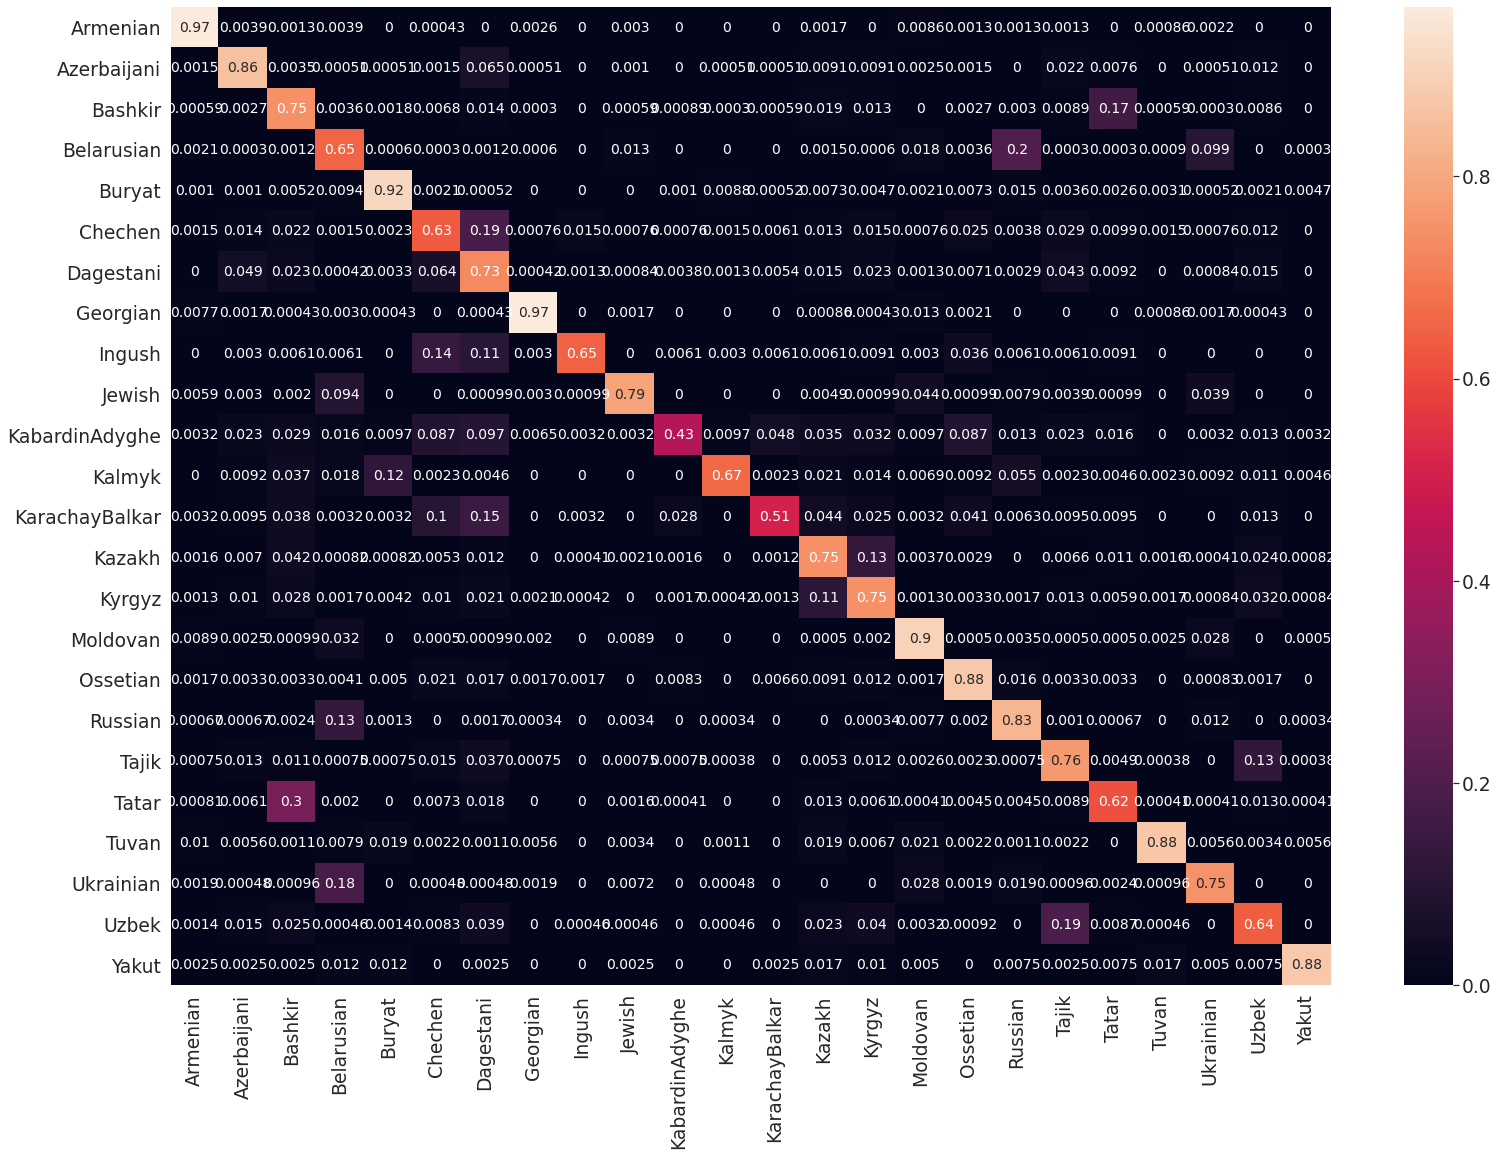

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9676	0.9606	0.9676	0.9641
Azerbaijani    	0.8606	0.8419	0.8606	0.8511
Bashkir        	0.7450	0.6863	0.7450	0.7144
Belarusian     	0.6535	0.6801	0.6535	0.6666
Buryat         	0.9173	0.9328	0.9173	0.9250
Chechen        	0.6339	0.6585	0.6339	0.6460
Dagestani      	0.7313	0.6645	0.7313	0.6963
Georgian       	0.9652	0.9821	0.9652	0.9736
Ingush         	0.6474	0.8730	0.6474	0.7435
Jewish         	0.7870	0.8674	0.7870	0.8252
KabardinAdyghe 	0.4290	0.7389	0.4290	0.5429
Kalmyk         	0.6651	0.8951	0.6651	0.7632
KarachayBalkar 	0.5095	0.7352	0.5095	0.6019
Kazakh         	0.7456	0.7527	0.7456	0.7491
Kyrgyz         	0.7477	0.7321	0.7477	0.7398
Moldovan       	0.9042	0.8554	0.9042	0.8791
Ossetian       	0.8784	0.8415	0.8784	0.8596
Russian        	0.8333	0.7426	0.8333	0.7853
Tajik          	0.7646	0.7331	0.7646	0.7485
Tatar          	0.6158	0.6792	0.6158	0.6460
Tuvan          	0.8751	0.9476	0.8751	0.9099
Ukrainian      	0.7507	0.7594	0.7507	0.7550


{'accuracy': 0.776340840492222,
 'f1 macro': 0.773147420692574,
 'precision macro': 0.7991600259049098,
 'recall macro': 0.756252814809992}

In [ ]:
test_model(clf, le, X_test, y_test)

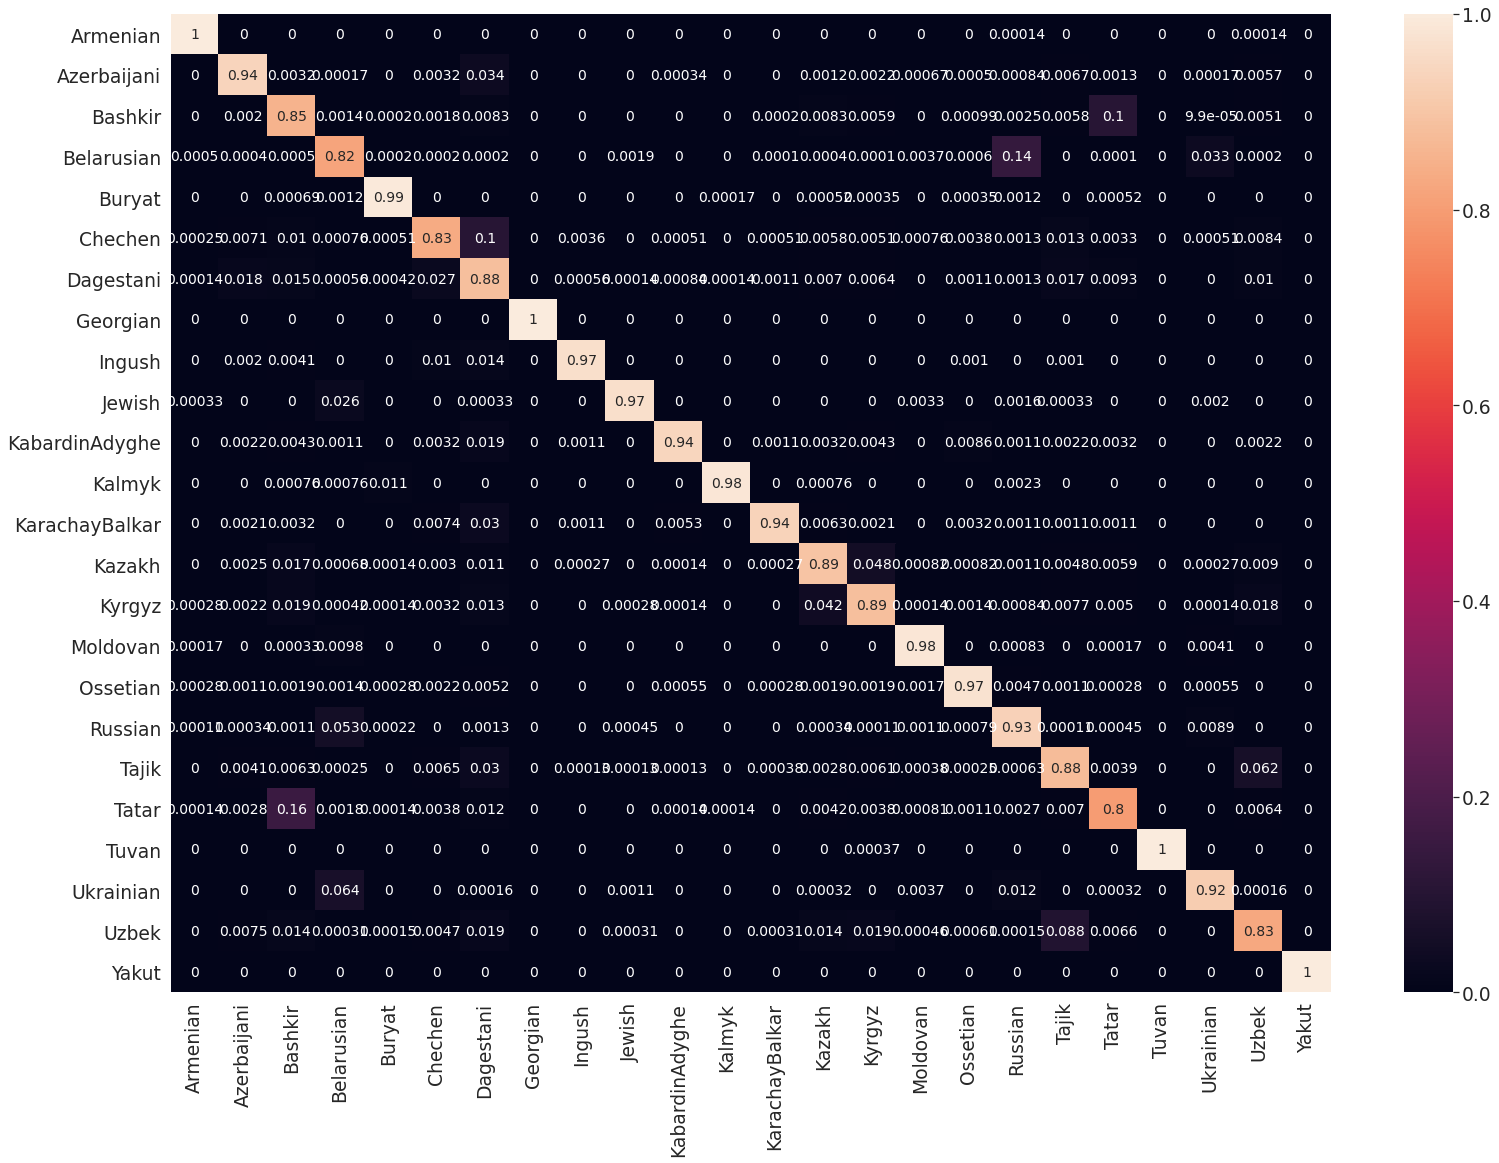

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9997	0.9980	0.9997	0.9989
Azerbaijani    	0.9401	0.9444	0.9401	0.9422
Bashkir        	0.8546	0.8307	0.8546	0.8425
Belarusian     	0.8183	0.8850	0.8183	0.8504
Buryat         	0.9950	0.9948	0.9950	0.9949
Chechen        	0.8321	0.8880	0.8321	0.8591
Dagestani      	0.8840	0.8185	0.8840	0.8500
Georgian       	1.0000	1.0000	1.0000	1.0000
Ingush         	0.9675	0.9765	0.9675	0.9720
Jewish         	0.9658	0.9879	0.9658	0.9767
KabardinAdyghe 	0.9430	0.9766	0.9430	0.9595
Kalmyk         	0.9847	0.9977	0.9847	0.9912
KarachayBalkar 	0.9367	0.9758	0.9367	0.9559
Kazakh         	0.8948	0.9106	0.8948	0.9026
Kyrgyz         	0.8859	0.8997	0.8859	0.8927
Moldovan       	0.9846	0.9815	0.9846	0.9831
Ossetian       	0.9746	0.9744	0.9746	0.9745
Russian        	0.9320	0.8381	0.9320	0.8825
Tajik          	0.8760	0.8747	0.8760	0.8754
Tatar          	0.7979	0.8201	0.7979	0.8088
Tuvan          	0.9996	1.0000	0.9996	0.9998
Ukrainian      	0.9188	0.9280	0.9188	0.9234


{'accuracy': 0.9074839408714496,
 'f1 macro': 0.9281292733399268,
 'precision macro': 0.9314150641037972,
 'recall macro': 0.9254727305765617}

In [ ]:
test_model(clf, le, X_train, y_train)

In [ ]:
clf = XGBClassifier(n_estimators=1000, reg_lambda=5, reg_alpha=5, tree_method='gpu_hist', random_state=0)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=5, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

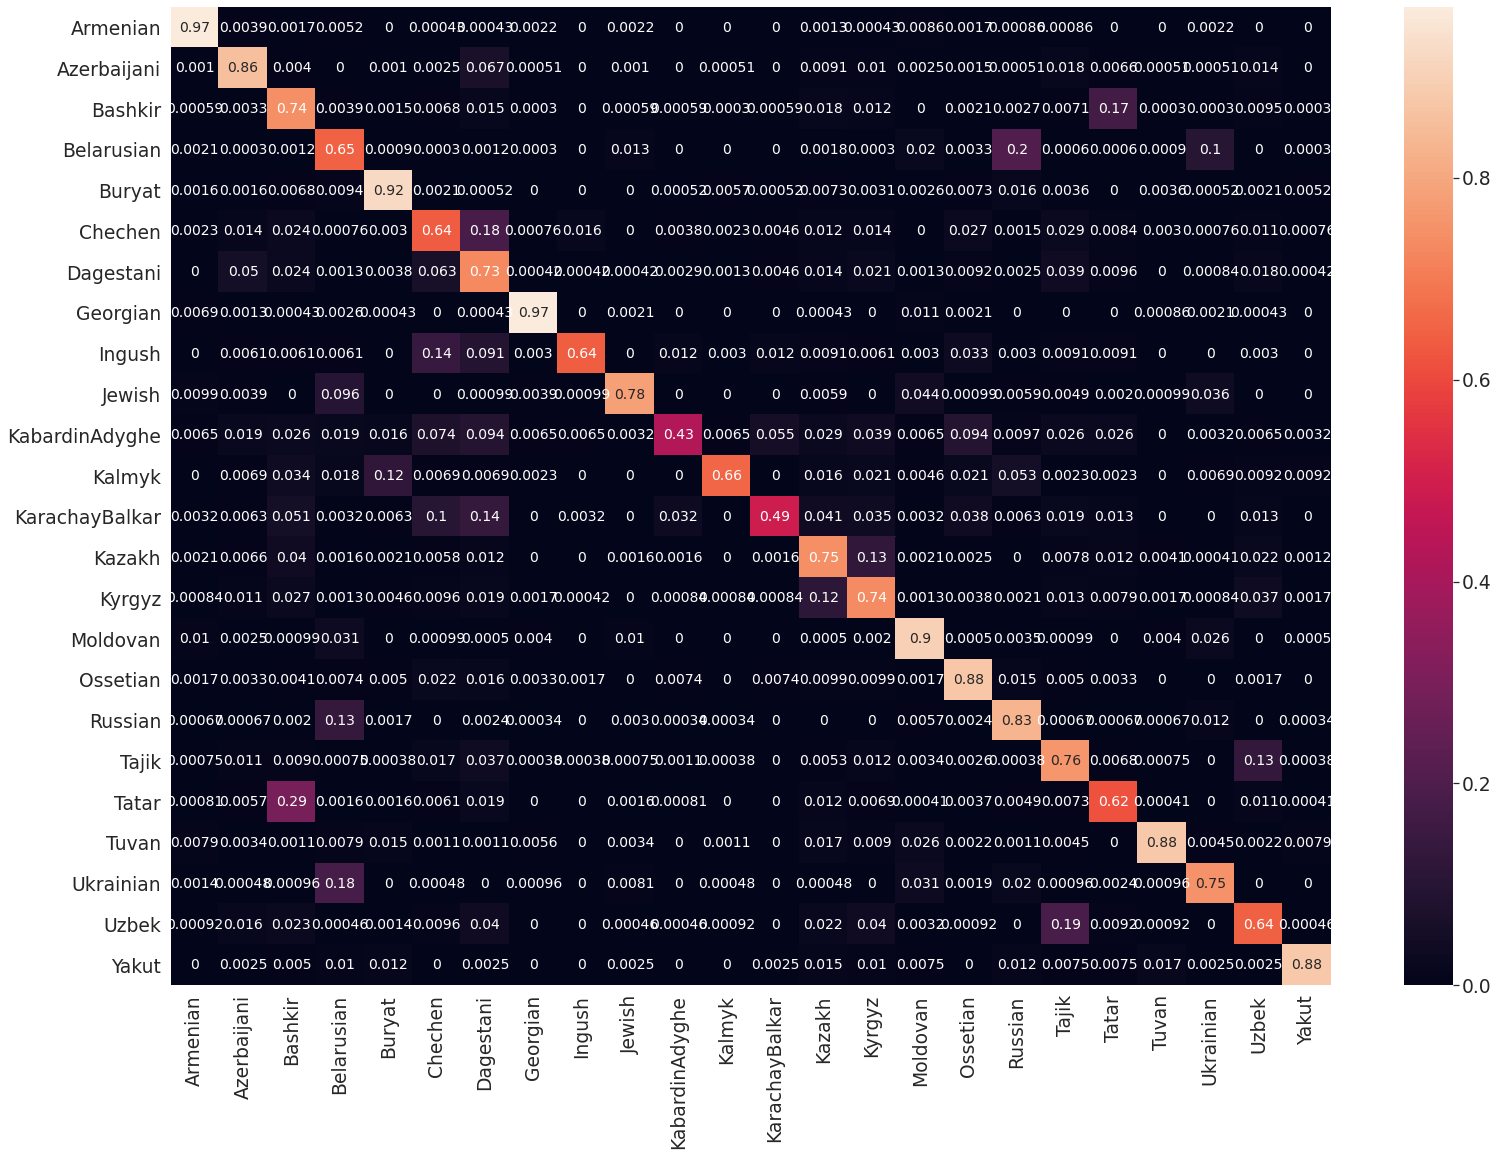

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9681	0.9598	0.9681	0.9639
Azerbaijani    	0.8591	0.8425	0.8591	0.8507
Bashkir        	0.7426	0.6863	0.7426	0.7134
Belarusian     	0.6499	0.6772	0.6499	0.6633
Buryat         	0.9204	0.9282	0.9204	0.9243
Chechen        	0.6377	0.6562	0.6377	0.6469
Dagestani      	0.7325	0.6677	0.7325	0.6986
Georgian       	0.9691	0.9813	0.9691	0.9751
Ingush         	0.6413	0.8755	0.6413	0.7404
Jewish         	0.7830	0.8678	0.7830	0.8232
KabardinAdyghe 	0.4258	0.7213	0.4258	0.5355
Kalmyk         	0.6583	0.9054	0.6583	0.7623
KarachayBalkar 	0.4905	0.7311	0.4905	0.5871
Kazakh         	0.7452	0.7517	0.7452	0.7484
Kyrgyz         	0.7356	0.7319	0.7356	0.7337
Moldovan       	0.9007	0.8533	0.9007	0.8764
Ossetian       	0.8751	0.8337	0.8751	0.8539
Russian        	0.8320	0.7432	0.8320	0.7851
Tajik          	0.7574	0.7375	0.7574	0.7473
Tatar          	0.6207	0.6731	0.6207	0.6458
Tuvan          	0.8785	0.9320	0.8785	0.9045
Ukrainian      	0.7502	0.7623	0.7502	0.7562


{'accuracy': 0.774947759461342,
 'f1 macro': 0.7703822242448078,
 'precision macro': 0.7959278482701176,
 'recall macro': 0.7540914819155683}

In [ ]:
test_model(clf, le, X_test, y_test)

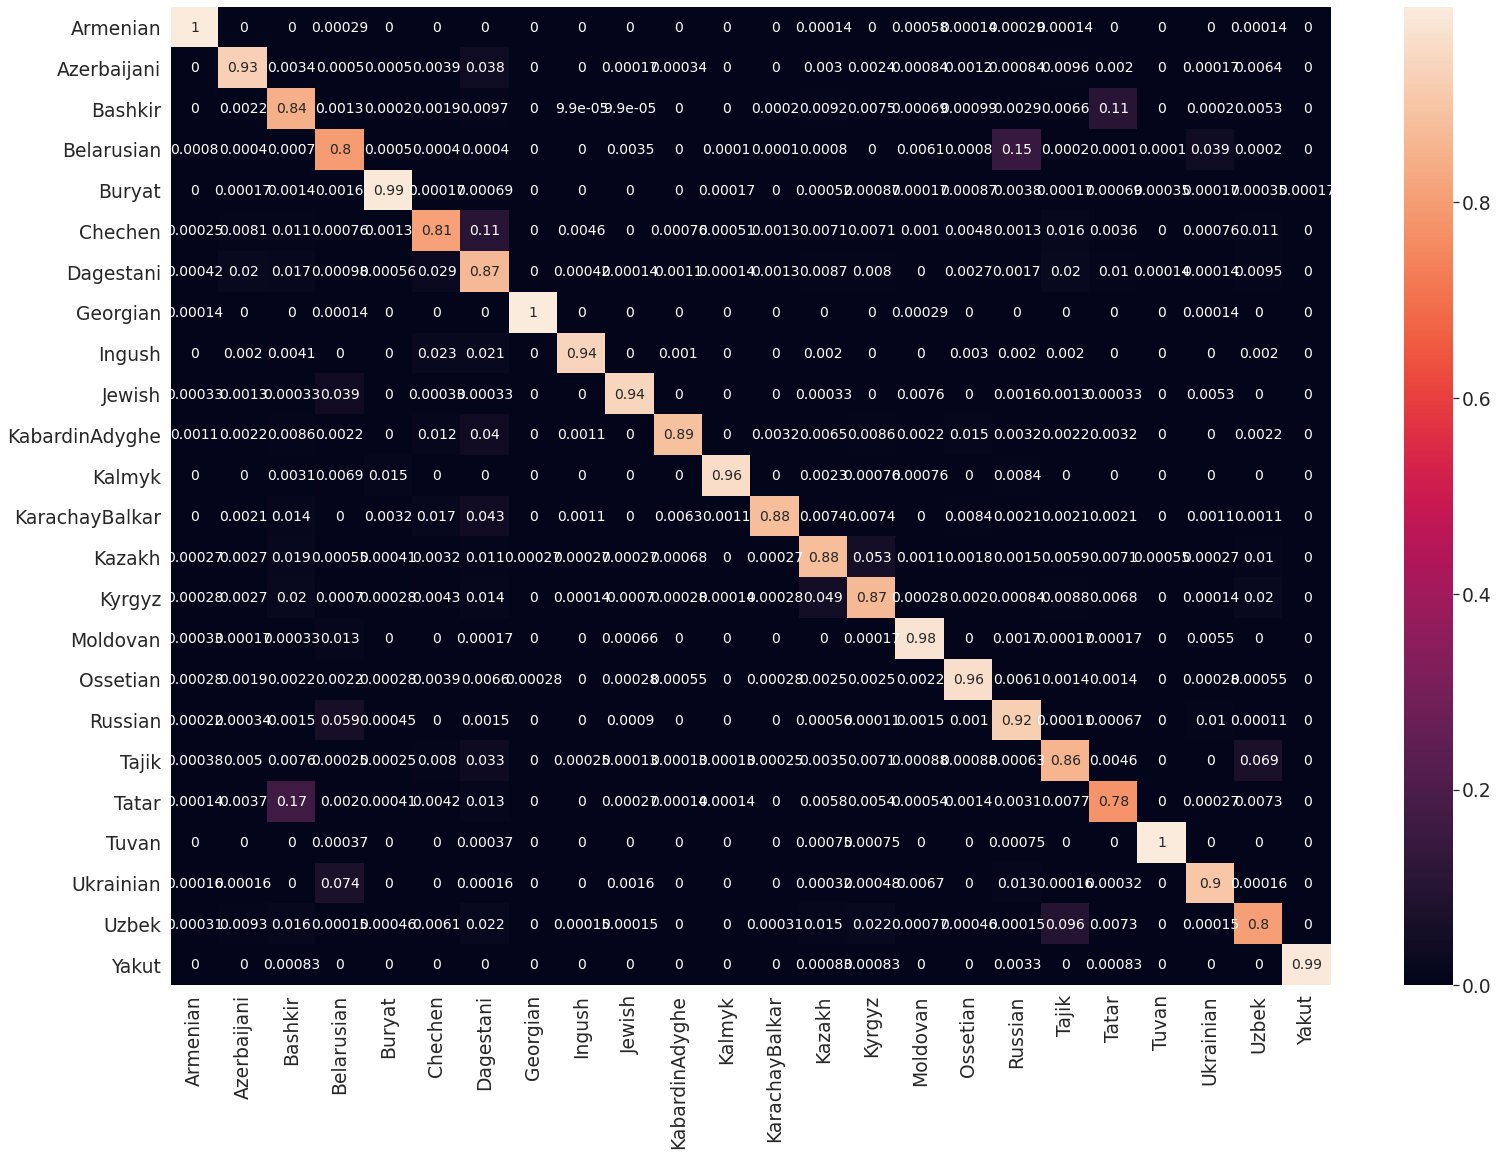

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9983	0.9956	0.9983	0.9969
Azerbaijani    	0.9265	0.9335	0.9265	0.9300
Bashkir        	0.8438	0.8149	0.8438	0.8291
Belarusian     	0.7985	0.8628	0.7985	0.8294
Buryat         	0.9877	0.9896	0.9877	0.9886
Chechen        	0.8103	0.8619	0.8103	0.8353
Dagestani      	0.8672	0.7972	0.8672	0.8307
Georgian       	0.9993	0.9996	0.9993	0.9994
Ingush         	0.9371	0.9686	0.9371	0.9526
Jewish         	0.9414	0.9755	0.9414	0.9582
KabardinAdyghe 	0.8871	0.9638	0.8871	0.9239
Kalmyk         	0.9626	0.9929	0.9626	0.9775
KarachayBalkar 	0.8808	0.9664	0.8808	0.9216
Kazakh         	0.8795	0.8925	0.8795	0.8859
Kyrgyz         	0.8686	0.8817	0.8686	0.8751
Moldovan       	0.9780	0.9674	0.9780	0.9727
Ossetian       	0.9644	0.9589	0.9644	0.9616
Russian        	0.9219	0.8247	0.9219	0.8706
Tajik          	0.8578	0.8567	0.8578	0.8573
Tatar          	0.7784	0.8052	0.7784	0.7916
Tuvan          	0.9970	0.9970	0.9970	0.9970
Ukrainian      	0.9029	0.9125	0.9029	0.9077


{'accuracy': 0.8932203389830509,
 'f1 macro': 0.9128061587655871,
 'precision macro': 0.9188395581378227,
 'recall macro': 0.9077345468452901}

In [ ]:
test_model(clf, le, X_train, y_train)

## Neural Network

In [ ]:
import torch
import torch.nn as nn

from nn_utils import *

In [ ]:
X_t_train = torch.tensor(X_train)
X_t_test = torch.tensor(X_test)
y_t_train = torch.tensor(y_train)
y_t_test = torch.tensor(y_test)

In [ ]:
BATCH_SIZE = 256

In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_t_train, y_t_train)
test_dataset = torch.utils.data.TensorDataset(X_t_test, y_t_test)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=16)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)

In [ ]:
fcnn = FCNN(300, 2, 0.4, nn.ReLU)
run_model(fcnn, train_loader, test_loader, 2e-4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/nn_utils.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sm(X)


Epoch 0 train loss: 2.8847468210919067 accuracy: 0.3782214998839099
Epoch 0 test loss: 2.7715532666832736 accuracy: 0.4765033666124913
Epoch 5 train loss: 2.6773721161455213 accuracy: 0.571759151768439
Epoch 5 test loss: 2.671119347126526 accuracy: 0.5763872765265846
Epoch 10 train loss: 2.644428234761304 accuracy: 0.604163764414519
Epoch 10 test loss: 2.644263449505236 accuracy: 0.6031808683538425
Epoch 15 train loss: 2.6312426600125756 accuracy: 0.6180403993498955
Epoch 15 test loss: 2.622565943813888 accuracy: 0.6257023450197353
Epoch 20 train loss: 2.6061489907821804 accuracy: 0.6420633077935144
Epoch 20 test loss: 2.6130051499993137 accuracy: 0.6341072672393777
Epoch 25 train loss: 2.57469908789833 accuracy: 0.6737249438897918
Epoch 25 test loss: 2.581511994085368 accuracy: 0.6662410030183422
Epoch 30 train loss: 2.5607011422072308 accuracy: 0.6883987307483941
Epoch 30 test loss: 2.5666016883398655 accuracy: 0.6808683538425818
Epoch 35 train loss: 2.5423893815219993 accuracy: 0.70

In [ ]:
fcnn = FCNN(100, 2, 0.1)
run_model(fcnn, train_loader, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/nn_utils.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sm(X)


Epoch 0 train loss: 2.750309112284443 accuracy: 0.5247504063153007
Epoch 0 test loss: 2.6576207333062527 accuracy: 0.5971209658695148
Epoch 5 train loss: 2.5745206148317545 accuracy: 0.6772618218404148
Epoch 5 test loss: 2.57972949919616 accuracy: 0.6702345019735315
Epoch 10 train loss: 2.54727940228906 accuracy: 0.7030570389288755
Epoch 10 test loss: 2.5670348271815735 accuracy: 0.6814952403064778
Epoch 15 train loss: 2.5361284402337403 accuracy: 0.7134432319479916
Epoch 15 test loss: 2.5552288554829254 accuracy: 0.6923380543301602
Epoch 20 train loss: 2.5296956000941813 accuracy: 0.7194644377370173
Epoch 20 test loss: 2.552440747706848 accuracy: 0.6953796145809148
Epoch 25 train loss: 2.518880349338645 accuracy: 0.7302762944044578
Epoch 25 test loss: 2.5451779337324334 accuracy: 0.7027629440445786
Epoch 30 train loss: 2.514403204870696 accuracy: 0.7349895518922684
Epoch 30 test loss: 2.5445877588712253 accuracy: 0.7027629440445786
Epoch 35 train loss: 2.5105704095103953 accuracy: 0.7

In [ ]:
fcnn = FCNN(100, 1, 0.5)
run_model(fcnn, train_loader, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/nn_utils.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.sm(X)


Epoch 0 train loss: 2.8140169677167837 accuracy: 0.47100069654051546
Epoch 0 test loss: 2.6896911302261803 accuracy: 0.5669607615509635
Epoch 5 train loss: 2.632171080844237 accuracy: 0.6207259500038697
Epoch 5 test loss: 2.6148746648483727 accuracy: 0.6354074762015324
Epoch 10 train loss: 2.6200865523649917 accuracy: 0.6305626499496942
Epoch 10 test loss: 2.608665304071099 accuracy: 0.6400742976549803
Epoch 15 train loss: 2.6145171798101745 accuracy: 0.6349740732141476
Epoch 15 test loss: 2.6062900737897885 accuracy: 0.6423496633387509
Epoch 20 train loss: 2.599019019438489 accuracy: 0.6510718984598716
Epoch 20 test loss: 2.5916396033834426 accuracy: 0.6563733457162758
Epoch 25 train loss: 2.5954942155592513 accuracy: 0.6537729277919666
Epoch 25 test loss: 2.5881051791490184 accuracy: 0.6596703041560251
Epoch 30 train loss: 2.588797434721843 accuracy: 0.6604055413667673
Epoch 30 test loss: 2.5828483852409048 accuracy: 0.664267471557929
Epoch 35 train loss: 2.587088130252196 accuracy: 